# Assignment 2: Naive Bayes [20 marks]

Student Name: Shervyn Singh

Student ID: 1236509

## General info

<b>Due date</b>: Friday, 2 September 2022, 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficiency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or excessively inefficient code.

7 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

13 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [7 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


In [1]:
# Importing all libraries
import math
import numpy as np
import pandas as pd
import sklearn.metrics

In [2]:
# This function should open a csv file and read the data into a useable format [0.5 mark]
def preprocess(filename):
    dataframe = pd.read_csv(filename)
    dataframe = dataframe.iloc[: , 1:] # Remove the instance identifier
    return dataframe

In [3]:
# This function should build a supervised NB model [3 marks]
# NOTE: This implementation draws heavily from - http://deebuls.github.io/Naive-Bayes-Pandas.html

def train(data):
    
    # Calculate prior probabilities of each label
    priors = data.groupby('label').size().div(len(data))
    
    # Return a list of features 
    features = list(data.columns[:-1])
    
    # Calculate likelihood (conditional probabilities) of a feature given a class label
    likelihood = dict()
    for ft in features:
        likelihood[ft] = data.groupby(['label', ft]).size().div(len(data)).div(priors)
    
    return priors, likelihood


In [4]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]
def predict(train_model, data):
    
    # Extract the probabilities calulcated using train()
    priors = train_model[0]
    conditionals = train_model[1]
    
    # separate data into usable lists
    features = list(data.columns[:-1])
    labels = list(data["label"].unique())
    instances = data.iloc[:,:-1].values
    
    # set up lists to record the final posterier probabilities and associated prediction of each instance 
    posterior_probabilities = []
    label_predictions = []

    # -------------------------------------------------------------------------------------------------------
    
    # go through each instance one at a time
    for instance in instances:

        # set up dictionary to the probability of each class prediction
        likelihoods = {label:0 for label in labels}

        # enumerate all the probabilities of the feature set for each class label
        for i in range(len(labels)):

            for j in range(len(features)):
                     
                try: # cannot calculate the probability if a feature/value/label is not observed in the data-set
                    raw_prob = conditionals[features[j]][labels[i]][instance[j]]
                except:
                    # epsilon smoothing -- E = 1 / N * 100
                    raw_prob = 1 / (len(instance) * 100)

                # log transform the probabilities to avoid underflow 
                log_prob = np.log(raw_prob)

                # add the probability to the dictionary for storage
                likelihoods[labels[i]] += log_prob

        # add the prior probability to our record of conditional probabilities (to find the posterior probability)
        for i in range(len(labels)):
            likelihoods[labels[i]] += np.log(priors[labels[i]])

        # append the posterior probability for this feature set to a list to be used later        
        posterior_probabilities.append(likelihoods)       

        # set the predicted class of this feature to the most frequently label observed
        prediction = max(likelihoods, key=lambda key: likelihoods[key])

        # append the prediction to a list for use later
        label_predictions.append(prediction)

    return posterior_probabilities, label_predictions

In [5]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(eval_metric, true_data, predictions, pos_label, average):

    if eval_metric == "accuracy":
        return sklearn.metrics.accuracy_score(true_data, predictions)

    if eval_metric == "precision":
        if pos_label == None: # multiclass dataset
            return sklearn.metrics.precision_score(true_data, predictions, average=average)
        else: # binary dataset
            return sklearn.metrics.precision_score(true_data, predictions, pos_label=pos_label)
    
    if eval_metric == "recall":
        if pos_label==None: # multiclass dataset
            return sklearn.metrics.recall_score(true_data, predictions, average=average)
        else: # binary dataset
            return sklearn.metrics.recall_score(true_data, predictions, pos_label=pos_label)
    
    if eval_metric == "f-score":
        if pos_label==None: # multiclass dataset
            return sklearn.metrics.f1_score(true_data, predictions, average=average)
        else: # binary dataset
            return sklearn.metrics.f1_score(true_data, predictions, pos_label=pos_label)

## Bank Marketing

In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Bank Marketing data
bank_data = preprocess('bank-marketing.csv')
bank_model = train(bank_data)
bank_predictions = predict(bank_model, bank_data)

# Second, print the full evaluation results from the evaluate() function
# This is the true labels of the dataset - to be used to evaluate the algorithm
bank_truth = list(bank_data['label'])

# ACCURACY SCORE
bank_accuracy =  evaluate("accuracy", bank_truth, bank_predictions[1], pos_label=None, average=None)
print("Accuracy: ", bank_accuracy)

# PRECISION
bank_precision_yes =  evaluate("precision", bank_truth, bank_predictions[1], pos_label="yes", average=None)
bank_precision_no = evaluate("precision", bank_truth, bank_predictions[1], pos_label="no", average=None)
print("Precision (yes): ", bank_precision_yes)
print("Precision (no): ", bank_precision_no)

# RECALL
bank_recall_yes =  evaluate("recall", bank_truth, bank_predictions[1], pos_label="yes", average=None)
bank_recall_no = evaluate("recall", bank_truth, bank_predictions[1], pos_label="no", average=None)
print("Recall (yes): ", bank_recall_yes)
print("Recall (no): ", bank_recall_no)

# F-SCORE
bank_fscore_yes =  evaluate("f-score", bank_truth, bank_predictions[1], pos_label="yes", average=None)
bank_fscore_no = evaluate("f-score", bank_truth, bank_predictions[1], pos_label="no", average=None)
print("F-score (yes): ", bank_fscore_yes)
print("F-score (no): ", bank_fscore_no)

print("")

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("Feature vectors of instances [0, 1, 2]: \n", bank_data.iloc[:,:-1].values[:3])

print("\nNumber of instances (N): ", bank_data.shape[0])
print("Number of features (F): ", len(list(bank_data.columns[:-1])))
print("Number of labels (L): ", len(list(bank_data["label"].unique())))

print("\n\nPredicted class probabilities for instance N-3: ", bank_predictions[0][-3])
print("Predicted class for instance N-3: ", bank_predictions[1][-3])
print("\nPredicted class probabilities for instance N-2: ", bank_predictions[0][-2])
print("Predicted class for instance N-2: ", bank_predictions[1][-2])
print("\nPredicted class probabilities for instance N-1: ", bank_predictions[0][-1])
print("Predicted class for instance N-1: ", bank_predictions[1][-1])


Accuracy:  0.8874142888741429
Precision (yes):  0.525
Precision (no):  0.9077318383555244
Recall (yes):  0.2418426103646833
Recall (no):  0.9715
F-score (yes):  0.3311432325886991
F-score (no):  0.9385339934790485

Feature vectors of instances [0, 1, 2]: 
 [['unemployed' 'married' 'primary' 'no' 'no' 'no' 'cellular' 'oct'
  'unknown']
 ['services' 'married' 'secondary' 'no' 'yes' 'yes' 'cellular' 'may'
  'failure']
 ['management' 'single' 'tertiary' 'no' 'yes' 'no' 'cellular' 'apr'
  'failure']]

Number of instances (N):  4521
Number of features (F):  9
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'no': -6.7116077635370655, 'yes': -8.583110831432391}
Predicted class for instance N-3:  no

Predicted class probabilities for instance N-2:  {'no': -10.619918711707394, 'yes': -11.68220339799834}
Predicted class for instance N-2:  no

Predicted class probabilities for instance N-1:  {'no': -14.88701380580801, 'yes': -16.28697922108946}
Predicted class for inst

## Student

In [7]:
# This cell should act as your "main" function where you call the above functions 
# on the full Student data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Student data
student_data = preprocess('student.csv')
student_model = train(student_data)
student_predictions = predict(student_model, student_data)

# Second, print the full evaluation results from the evaluate() function
# This is the true labels of the dataset - to be used to evaluate the algorithm
student_truth = list(student_data['label'])

# ACCURACY SCORE
student_accuracy =  evaluate("accuracy", student_truth, student_predictions[1], pos_label=None, average=None)
print("Accuracy: ", student_accuracy)

# PRECISION
student_precision_macro = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="macro")
student_precision_micro = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="micro")
student_precision_wavg = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("Precision (macro avg): ", student_precision_macro)
print("Precision (micro avg): ", student_precision_micro)
print("Precision (weighted avg): ", student_precision_wavg)

# RECALL
student_recall_macro = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="macro")
student_recall_micro = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="micro")
student_recall_wavg = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("Recall (macro avg): ", student_recall_macro)
print("Recall (micro avg): ", student_recall_micro)
print("Recall (weighted avg): ", student_recall_wavg)

# F-SCORE
student_fscore_macro = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="macro")
student_fscore_micro = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="micro")
student_fscore_wavg = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("F-score (macro avg): ", student_fscore_macro)
print("F-score (micro avg): ", student_fscore_micro)
print("F-score (weighted avg): ", student_fscore_wavg)

print("")

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("Feature vectors of instances [0, 1, 2]: \n", student_data.iloc[:,:-1].values[:3])

print("\nNumber of instances (N): ", student_data.shape[0])
print("Number of features (F): ", len(list(student_data.columns[:-1])))
print("Number of labels (L): ", len(list(student_data["label"].unique())))

print("\n\nPredicted class probabilities for instance N-3: ", student_predictions[0][-3])
print("Predicted class for instance N-3: ", student_predictions[1][-3])
print("\nPredicted class probabilities for instance N-2: ", student_predictions[0][-2])
print("Predicted class for instance N-2: ", student_predictions[1][-2])
print("\nPredicted class probabilities for instance N-1: ", student_predictions[0][-1])
print("Predicted class for instance N-1: ", student_predictions[1][-1])


Accuracy:  0.48382126348228044
Precision (macro avg):  0.48358500654751285
Precision (micro avg):  0.48382126348228044
Precision (weighted avg):  0.4857742081328605
Recall (macro avg):  0.4763644469373179
Recall (micro avg):  0.48382126348228044
Recall (weighted avg):  0.48382126348228044
F-score (macro avg):  0.4784911527273963
F-score (micro avg):  0.48382126348228044
F-score (weighted avg):  0.4834963990558278

Feature vectors of instances [0, 1, 2]: 
 [['GP' 'F' 'U' 'GT3' 'A' 'high' 'high' 'at_home' 'teacher' 'course'
  'mother' 'medium' 'medium' 'none' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no'
  'no' 'good' 'mediocre' 'good' 'very_bad' 'very_bad' 'mediocre'
  'four_to_six']
 ['GP' 'F' 'U' 'GT3' 'T' 'low' 'low' 'at_home' 'other' 'course' 'father'
  'low' 'medium' 'none' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no'
  'excellent' 'mediocre' 'mediocre' 'very_bad' 'very_bad' 'mediocre'
  'one_to_three']
 ['GP' 'F' 'U' 'LE3' 'T' 'low' 'low' 'at_home' 'other' 'other' 'mother'
  'low' 'medium' 

## Obesity

In [8]:

# This cell should act as your "main" function where you call the above functions 
# on the full Obesity data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Obesity data
obesity_data = preprocess('obesity.csv')
obesity_model = train(obesity_data)
obesity_predictions = predict(obesity_model, obesity_data)

# Second, print the full evaluation results from the evaluate() function
# This is the true labels of the dataset - to be used to evaluate the algorithm
obesity_truth = list(obesity_data['label'])

# ACCURACY SCORE
obesity_accuracy =  evaluate("accuracy", obesity_truth, obesity_predictions[1], pos_label=None, average=None)
print("Accuracy: ", obesity_accuracy)

# PRECISION
obesity_precision_yes =  evaluate("precision", obesity_truth, obesity_predictions[1], pos_label="obese", average=None)
obesity_precision_no = evaluate("precision", obesity_truth, obesity_predictions[1], pos_label="not-obese", average=None)
print("Precision (obese): ", obesity_precision_yes)
print("Precision (not-obese): ", obesity_precision_no)

# RECALL
obesity_recall_yes =  evaluate("recall", obesity_truth, obesity_predictions[1], pos_label="obese", average=None)
obesity_recall_no = evaluate("recall", obesity_truth, obesity_predictions[1], pos_label="not-obese", average=None)
print("Recall (obese): ", obesity_recall_yes)
print("Recall (not-obese): ", obesity_recall_no)

# F-SCORE
obesity_fscore_yes =  evaluate("f-score", obesity_truth, obesity_predictions[1], pos_label="obese", average=None)
obesity_fscore_no = evaluate("f-score", obesity_truth, obesity_predictions[1], pos_label="not-obese", average=None)
print("F-score (obese): ", obesity_fscore_yes)
print("F-score (not-obese): ", obesity_fscore_no)

print("")

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("Feature vectors of instances [0, 1, 2]: \n", obesity_data.iloc[:,:-1].values[:3])

print("\nNumber of instances (N): ", obesity_data.shape[0])
print("Number of features (F): ", len(list(obesity_data.columns[:-1])))
print("Number of labels (L): ", len(list(obesity_data["label"].unique())))

print("\n\nPredicted class probabilities for instance N-3: ", obesity_predictions[0][-3])
print("Predicted class for instance N-3: ", obesity_predictions[1][-3])
print("\nPredicted class probabilities for instance N-2: ", obesity_predictions[0][-2])
print("Predicted class for instance N-2: ", obesity_predictions[1][-2])
print("\nPredicted class probabilities for instance N-1: ", obesity_predictions[0][-1])
print("Predicted class for instance N-1: ", obesity_predictions[1][-1])


Accuracy:  0.7783041212695405
Precision (obese):  0.71
Precision (not-obese):  0.8682766190998902
Recall (obese):  0.8765432098765432
Recall (not-obese):  0.694468832309043
F-score (obese):  0.7845303867403315
F-score (not-obese):  0.7717073170731708

Feature vectors of instances [0, 1, 2]: 
 [['Male' 'yes' 'yes' 'mid' 'high' 'Sometimes' 'yes' 'mid' 'no'
  'low-activity' 'mediocre' 'Frequently' 'Public_Transportation']
 ['Male' 'yes' 'yes' 'mid' 'high' 'Sometimes' 'no' 'high' 'no'
  'low-activity' 'good' 'Sometimes' 'Public_Transportation']
 ['Male' 'yes' 'yes' 'high' 'high' 'Sometimes' 'no' 'high' 'no'
  'low-activity' 'good' 'Sometimes' 'Public_Transportation']]

Number of instances (N):  2111
Number of features (F):  13
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'not-obese': -11.010971850189438, 'obese': -16.78139621234939}
Predicted class for instance N-3:  not-obese

Predicted class probabilities for instance N-2:  {'not-obese': -10.29921174389561

#### Part 2: Conceptual questions [13 marks]

## Question 1: One-R Baseline [3 marks]

In [9]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.

###### The 'TRAINING' function
def one_r_baseline(data):
    
    # Get the list of features
    R_features = list(data.columns[:-1])

    # Set up dictionaries to hold the data    
    feature_value_predictions = dict()
    error_rates = dict()

    # For each feature in the set of features
    for ft in R_features:
        
        wrong_predictions = 0
        total_predictions = 0
        feature_value_predictions[ft] = {}

        # get the list of values that each feature can take
        feature_values = list(data[ft].unique())
        
        # for each value that the feature has 
        for ft_val in feature_values:

            # find instances where the feature takes on the value
            filtered_rows = data.loc[data[ft] == ft_val]

            # find the counts of each class label
            label_count = filtered_rows['label'].value_counts().to_dict()

            # set the most frequent class as the prediction ---> 0th index since it is sorted by default
            prediction = list(label_count)[0]

            #append information to the dictionary
            feature_value_predictions[ft][ft_val] = prediction

            # calculate the correct / incorrect predictions for this specific feature-value pair 
            sum_val = sum(label_count.values())
            total_predictions += sum_val

            err_val = sum_val - label_count[prediction]
            wrong_predictions += err_val
    
        # ERROR RATE CALCULATION 
        error_rt = wrong_predictions/total_predictions
        error_rates[ft] = error_rt

    # only return the feature-value set and error-rate of the 'best' (most predictive) set
    error_rates = sorted(error_rates.items(), key=lambda x:x[1]) # sort the dictionary by error-rate in ascending order
    most_predictive_feature_set = feature_value_predictions[error_rates[0][0]] # find the feature set that provides the best prediction of the class label
    most_predictive_feature_set = [(k, v) for k, v in most_predictive_feature_set.items()] #convert dict to list of tuples - https://www.geeksforgeeks.org/python-convert-dictionary-to-list-of-tuples/

    return error_rates[0], most_predictive_feature_set


##### The 'PREDICTION' function
def one_r_predict(oneR_data, base_data):
    
    feature_name = oneR_data[0][0]
    prediction_guide = oneR_data[1]

    # create a copy of the dataset so that we can safely manipulate it
    data_copy = base_data

    for value in prediction_guide:
        
        feature_val = value[0]
        prediction = value[1]
        
        # Change class based on the prediction guide for the chosen feature -- https://kanoki.org/2019/07/17/pandas-how-to-replace-values-based-on-conditions/
        data_copy.loc[(data_copy[feature_name] == feature_val), 'label']=prediction
    
    # extract the label predictions into a list to be used for evaluation
    oneR_predictions = data_copy['label'].tolist()
    
    return oneR_predictions

In [10]:
import warnings
warnings.filterwarnings('ignore')

# BANKING ################################################################################################################################
print("===== One-R insights from the BANK MARKETING dataset =====")
oneR_bank_data = preprocess("bank-marketing.csv")
oneR_bank_model = one_r_baseline(oneR_bank_data)
oneR_bank_predict = one_r_predict(oneR_bank_model, oneR_bank_data)

print("For the BANK MARKETING dataset --- the most predictive feature and its corresponding error rate is:", oneR_bank_model[0])
print("")

# ACCURACY SCORE
oneR_bank_accuracy =  evaluate("accuracy", bank_truth, oneR_bank_predict, pos_label=None, average=None)
print("Accuracy: ", oneR_bank_accuracy)

# PRECISION
oneR_bank_precision_yes =  evaluate("precision", bank_truth, oneR_bank_predict, pos_label="yes", average=None)
oneR_bank_precision_no = evaluate("precision", bank_truth, oneR_bank_predict, pos_label="no", average=None)
print("Precision (yes): ", oneR_bank_precision_yes)
print("Precision (no): ", oneR_bank_precision_no)

# RECALL
oneR_bank_recall_yes =  evaluate("recall", bank_truth, oneR_bank_predict, pos_label="yes", average=None)
oneR_bank_recall_no = evaluate("recall", bank_truth, oneR_bank_predict, pos_label="no", average=None)
print("Recall (yes): ", oneR_bank_recall_yes)
print("Recall (no): ", oneR_bank_recall_no)

# F-SCORE
oneR_bank_fscore_yes =  evaluate("f-score", bank_truth, oneR_bank_predict, pos_label="yes", average=None)
oneR_bank_fscore_no = evaluate("f-score", bank_truth, oneR_bank_predict, pos_label="no", average=None)
print("F-score (yes): ", oneR_bank_fscore_yes)
print("F-score (no): ", oneR_bank_fscore_no)



# STUDENT ################################################################################################################################
print("\n\n===== One-R insights from the STUDENT dataset =====")
oneR_student_data = preprocess("student.csv")
oneR_student_model = one_r_baseline(oneR_student_data)
oneR_student_predict = one_r_predict(oneR_student_model, oneR_student_data)

print("For the STUDENT dataset --- the most predictive feature and its corresponding error rate is:", oneR_student_model[0])
print("")

# ACCURACY SCORE
oneR_student_accuracy =  evaluate("accuracy", student_truth, oneR_student_predict, pos_label=None, average=None)
print("Accuracy: ", oneR_student_accuracy)

# PRECISION
oneR_student_precision_macro = evaluate("precision", student_truth, oneR_student_predict, pos_label=None, average="macro")
oneR_student_precision_micro = evaluate("precision", student_truth, oneR_student_predict, pos_label=None, average="micro")
oneR_student_precision_wavg = evaluate("precision", student_truth, oneR_student_predict, pos_label=None, average="weighted")
print("Precision (macro avg): ", oneR_student_precision_macro)
print("Precision (micro avg): ", oneR_student_precision_micro)
print("Precision (weighted avg): ", oneR_student_precision_wavg)

# RECALL
oneR_student_recall_macro = evaluate("recall", student_truth, oneR_student_predict, pos_label=None, average="macro")
oneR_student_recall_micro = evaluate("recall", student_truth, oneR_student_predict, pos_label=None, average="micro")
oneR_student_recall_wavg = evaluate("recall", student_truth, oneR_student_predict, pos_label=None, average="weighted")
print("Recall (macro avg): ", oneR_student_recall_macro)
print("Recall (micro avg): ", oneR_student_recall_micro)
print("Recall (weighted avg): ", oneR_student_recall_wavg)

# F-SCORE
oneR_student_fscore_macro = evaluate("f-score", student_truth, oneR_student_predict, pos_label=None, average="macro")
oneR_student_fscore_micro = evaluate("f-score", student_truth, oneR_student_predict, pos_label=None, average="micro")
oneR_student_fscore_wavg = evaluate("f-score", student_truth, oneR_student_predict, pos_label=None, average="weighted")
print("F-score (macro avg): ", oneR_student_fscore_macro)
print("F-score (micro avg): ", oneR_student_fscore_micro)
print("F-score (weighted avg): ", oneR_student_fscore_wavg)



# OBESITY ################################################################################################################################
print("\n\n===== One-R insights from the OBESITY dataset =====")
oneR_obesity_data = preprocess("obesity.csv")
oneR_obesity_model = one_r_baseline(oneR_obesity_data)
oneR_obesity_predict = one_r_predict(oneR_obesity_model, oneR_obesity_data)

print("For the OBESITY dataset --- the most predictive feature and its corresponding error rate is:", oneR_obesity_model[0])
print("")

# ACCURACY SCORE
oneR_obesity_accuracy =  evaluate("accuracy", obesity_truth, oneR_obesity_predict, pos_label=None, average=None)
print("Accuracy: ", oneR_obesity_accuracy)

# PRECISION
oneR_obesity_precision_yes =  evaluate("precision", obesity_truth, oneR_obesity_predict, pos_label="obese", average=None)
oneR_obesity_precision_no = evaluate("precision", obesity_truth, oneR_obesity_predict, pos_label="not-obese", average=None)
print("Precision (obese): ", oneR_obesity_precision_yes)
print("Precision (not-obese): ", oneR_obesity_precision_no)

# RECALL
oneR_obesity_recall_yes =  evaluate("recall", obesity_truth, oneR_obesity_predict, pos_label="obese", average=None)
oneR_obesity_recall_no = evaluate("recall", obesity_truth, oneR_obesity_predict, pos_label="not-obese", average=None)
print("Recall (obese): ", oneR_obesity_recall_yes)
print("Recall (not-obese): ", oneR_obesity_recall_no)

# F-SCORE
oneR_obesity_fscore_yes =  evaluate("f-score", obesity_truth, oneR_obesity_predict, pos_label="obese", average=None)
oneR_obesity_fscore_no = evaluate("f-score", obesity_truth, oneR_obesity_predict, pos_label="not-obese", average=None)
print("F-score (obese): ", oneR_obesity_fscore_yes)
print("F-score (not-obese): ", oneR_obesity_fscore_no)



===== One-R insights from the BANK MARKETING dataset =====
For the BANK MARKETING dataset --- the most predictive feature and its corresponding error rate is: ('poutcome', 0.1070559610705596)

Accuracy:  0.8929440389294404
Precision (yes):  0.6434108527131783
Precision (no):  0.9002732240437158
Recall (yes):  0.15930902111324377
Recall (no):  0.9885
F-score (yes):  0.2553846153846154
F-score (no):  0.94232602478551


===== One-R insights from the STUDENT dataset =====
For the STUDENT dataset --- the most predictive feature and its corresponding error rate is: ('Fedu', 0.6656394453004623)

Accuracy:  0.33436055469953774
Precision (macro avg):  0.10674084293026231
Precision (micro avg):  0.33436055469953774
Precision (weighted avg):  0.17685105019090347
Recall (macro avg):  0.18955008507247315
Recall (micro avg):  0.33436055469953774
Recall (weighted avg):  0.33436055469953774
F-score (macro avg):  0.1275580702409252
F-score (micro avg):  0.33436055469953774
F-score (weighted avg):  0.21

**Question 1.b**

For the student dataset, the Naive Bayes classifier (NB) is clearly the superior classifier. NB shows an accuracy rating of 0.484; meaning 48.4% of the predictions made were correct. In contrast, One-R baseline (OR) only managed to predict the correct class 33.4% of the time. Furthermore, the figures for precision, recall and f-score using NB all hover around 48%, while for OR it is around 10-30%. This is fairly logical as the student dataset is multiclass with much more nuance that is lost when using a single rule for prediction based only on frequency.

For the bank-marketing dataset, we see the opposite behaviour. OR makes an accurate prediction 89.3% of the time, while NB correctly predicts 88.5% of the time. The figures for precision, recall and f-score for NB and OR are also similar. A likely explanation is that this dataset is extremely weighted (No: 88.5%, Yes: 11.5%). This means we can be very accurate by simple classifying all instances as "No".

## Question 2: Evaluation strategy [3 marks] 


In [11]:
# Write additional code here, if necessary (you may insert additional code cells)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def kf_cv(n, raw_data, classification_type, int_label, not_int_label):

    kf = KFold(n_splits=n, random_state=None, shuffle=False)
    
    accuracy_scores = []
    
    # Binary dataset
    precision_interesting = []
    precision_not_interesting = []
    recall_interesting = []
    recall_not_interesting = []
    fscore_interesting = []
    fscore_not_interesting = []

    # Multiclass dataset
    precision_macro = []
    precision_micro = []
    precision_wavg = []
    recall_macro = []
    recall_micro = []
    recall_wavg = []
    fscore_macro = []
    fscore_micro = []
    fscore_wavg = []


    for train_index, test_index in kf.split(raw_data):

        # Train data
        train_data = raw_data.iloc[train_index,:]

        # Test data
        test_data = raw_data.iloc[test_index, :]
        
        # -----------------------------------------------------------------------------------------------------------

        # Train the model
        cv_train_model = train(train_data)

        # -----------------------------------------------------------------------------------------------------------

        # Predict classes for the test model
        cv_prediction = predict(cv_train_model, test_data)
        
        # -----------------------------------------------------------------------------------------------------------

        # Evaluate the model
        truth = list(test_data["label"])

        # ACCURACY
        acc = evaluate("accuracy", truth, cv_prediction[1], pos_label=None, average=None)
        accuracy_scores.append(acc)
        
        # Type of evaluation depends on whether we are performing binary or multiclass predictions
        if classification_type == "binary": 
            
            # PRECISION
            p_int = evaluate("precision", truth, cv_prediction[1], pos_label=int_label, average=None)
            p_not_int = evaluate("precision", truth, cv_prediction[1], pos_label=not_int_label, average=None)
            precision_interesting.append(p_int)
            precision_not_interesting.append(p_not_int)
            
            # RECALL
            r_int = evaluate("recall", truth, cv_prediction[1], pos_label=int_label, average=None)
            r_not_int = evaluate("recall", truth, cv_prediction[1], pos_label=not_int_label, average=None)
            recall_interesting.append(r_int)
            recall_not_interesting.append(r_not_int)

            # FSCORE
            f_int = evaluate("f-score", truth, cv_prediction[1], pos_label=int_label, average=None)
            f_not_int = evaluate("f-score", truth, cv_prediction[1], pos_label=not_int_label, average=None)
            fscore_interesting.append(f_int)
            fscore_not_interesting.append(f_not_int)

        if classification_type == "multiclass":

            # PRECISION
            p_macro = evaluate("precision", truth, cv_prediction[1], pos_label=None, average="macro")
            p_micro = evaluate("precision", truth, cv_prediction[1], pos_label=None, average="micro")
            p_wavg = evaluate("precision", truth, cv_prediction[1], pos_label=None, average="weighted")
            precision_macro.append(p_macro)
            precision_micro.append(p_micro)
            precision_wavg.append(p_wavg)

            # RECALL
            r_macro = evaluate("recall", truth, cv_prediction[1], pos_label=None, average="macro")
            r_micro = evaluate("recall", truth, cv_prediction[1], pos_label=None, average="micro")
            r_wavg = evaluate("recall", truth, cv_prediction[1], pos_label=None, average="weighted")
            recall_macro.append(p_macro)
            recall_micro.append(p_micro)
            recall_wavg.append(p_wavg)

            # FSCORE
            f_macro = evaluate("f-score", truth, cv_prediction[1], pos_label=None, average="macro")
            f_micro = evaluate("f-score", truth, cv_prediction[1], pos_label=None, average="micro")
            f_wavg = evaluate("f-score", truth, cv_prediction[1], pos_label=None, average="weighted")
            fscore_macro.append(p_macro)
            fscore_micro.append(p_micro)
            fscore_wavg.append(p_wavg)

 # -----------------------------------------------------------------------------------------------------------
    # print the evaluation information
    if classification_type == "binary": 
        print("Evaluation scores for " + str(n) + " fold crossvalidation (averaged): ")
        print("     Accuracy: ", np.mean(accuracy_scores))
        print("     Precision (interesting): ", np.mean(precision_interesting))
        print("     Precision (not interesting): ", np.mean(precision_not_interesting))
        print("     Recall (interesting): ", np.mean(recall_interesting))
        print("     Recall (not interesting): ", np.mean(recall_not_interesting))
        print("     F-score (interesting): ", np.mean(fscore_interesting))
        print("     F-score (not interesting): ", np.mean(fscore_not_interesting))

    if classification_type == "multiclass": 
        print("Evaluation scores for " + str(n) + " fold crossvalidation (averaged): ")
        print("     Accuracy: ", np.mean(accuracy_scores))
        print("     Precision (macro avg): ", np.mean(precision_macro))
        print("     Precision (micro avg): ", np.mean(precision_micro))
        print("     Precision (weighted avg): ", np.mean(precision_wavg))
        print("     Recall (macro avg): ", np.mean(recall_macro))
        print("     Recall (micro avg): ", np.mean(recall_micro))
        print("     Recall (weighted avg): ", np.mean(recall_wavg))
        print("     F-score (macro avg): ", np.mean(fscore_macro))
        print("     F-score (micro avg): ", np.mean(fscore_micro))
        print("     F-score (weighted avg): ", np.mean(fscore_wavg))

In [12]:
print("K-Fold Cross Validation for the BANK-MARKETING dataset (k=2, k=10) ------------------------------- \n")
raw_bank = preprocess('bank-marketing.csv')
kf_cv(2, raw_bank, "binary", "yes", "no")
print("")
kf_cv(10, raw_bank, "binary", "yes", "no")

print("\n\nK-Fold Cross Validation for the STUDENT dataset (k=2, k=10) ------------------------------- \n")
raw_student = preprocess('student.csv')
kf_cv(2, raw_student, "multiclass", None, None)
print("")
kf_cv(10, raw_student, "multiclass", None, None)

print("\n\nK-Fold Cross Validation for the OBESITY dataset (k=2, k=10) ------------------------------- \n")
raw_obesity = preprocess('obesity.csv')
kf_cv(2, raw_obesity, "binary", "obese", "not-obese")
print("")
kf_cv(10, raw_obesity, "binary", "obese", "not-obese")

K-Fold Cross Validation for the BANK-MARKETING dataset (k=2, k=10) ------------------------------- 

Evaluation scores for 2 fold crossvalidation (averaged): 
     Accuracy:  0.8865311378393929
     Precision (interesting):  0.5207784606379866
     Precision (not interesting):  0.9068610342422092
     Recall (interesting):  0.23377121771217713
     Recall (not interesting):  0.9714717867946698
     F-score (interesting):  0.32205387205387204
     F-score (not interesting):  0.9380540029473785

Evaluation scores for 10 fold crossvalidation (averaged): 
     Accuracy:  0.8863100470804275
     Precision (interesting):  0.516582467875374
     Precision (not interesting):  0.9072458881543597
     Recall (interesting):  0.23971910948253305
     Recall (not interesting):  0.9707688841103888
     F-score (interesting):  0.32578760282617936
     F-score (not interesting):  0.937867872257641


K-Fold Cross Validation for the STUDENT dataset (k=2, k=10) ------------------------------- 

Evaluatio

**Question 2**

I implemented a 2-fold and 10-fold cross validation (CV) strategy for each of the datasets. I observed lower evaluation scores for almost all of the measures (accuracy, precision, recall, f-score) when using CV, compared to those observed when training on the full dataset. Furthermore, 10-fold CV outperformed 2-fold CV for the 'student' and 'obesity' dataset, however the opposite behaviour was seen in the 'bank-marketing' dataset.

Overall, this was expected, as CV never has any overlap in train/test datasets (even though it technically trains/tests over the whole set), and so dataset splits between each fold will produce slightly more variable results as the model is not seeing a portion of the data for each iteration. The effect of this is minimised as we average the evaluation metrics. 

In terms of the obesity and bank marketing dataset, the improvement in evaluation scores between testing on all train data vs. CV is extremely marginal (Accuracy scores --> [Bank_full: 0.8874, Bank_CV: 0.8865], [Obesity_full: 0.7783, Obesity_CV: 0.7778]). 

A likely explanation for 'bank-marketing' is that it is a binary classification dataset, with one of the labels heavily outweighing the other (88.5% of instances = No). A potential explanation for 'obesity' is that there is a feature-set which strongly predicts the data, and since this is observed in all instances, the predictions will always be similar.

## Question 3: Feature Selection and Naive Bayes Assumptions [3 marks]

In [13]:
# Write additional code here, if necessary (you may insert additional code cells)
# Resource used: https://www.kaggle.com/code/ryanholbrook/mutual-information/tutorial
from sklearn.feature_selection import mutual_info_classif as mic
import matplotlib.pyplot as plt

def plot_mutual_information(data):

    mi_features = data.iloc[:,:-1]
    mi_labels = data["label"]

    # Transform categorial data to numerical data - https://stackoverflow.com/questions/39390160/pandas-factorize-on-an-entire-data-frame/39390208#39390208
    numerical_mi_features = mi_features.apply(lambda x: pd.factorize(x)[0])

    # Calculate the mutual information scores
    mi_score = pd.Series(mic(numerical_mi_features, mi_labels), index=numerical_mi_features.columns)
    mi_score = mi_score.sort_values()
    print("Feature  /  MI scores (ascending)")
    print(  mi_score)

    # Plot the graph
    plt.figure()
    width = np.arange(len(mi_score))
    ticks = list(mi_score.index)
    plt.barh(width, mi_score)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

MUTUAL INFORMATION FOR OBESITY ==================================
Feature  /  MI scores (ascending)
FCVC                              0.007941
FAF                               0.008096
TUE                               0.009024
SMOKE                             0.009603
Gender                            0.010850
SCC                               0.018514
CH2O                              0.020755
MTRANS                            0.022947
CALC                              0.029511
FAVC                              0.043352
NCP                               0.045909
CAEC                              0.101170
family_history_with_overweight    0.111248
dtype: float64


MUTUAL INFORMATION FOR BANK-MARKETING ==================================
Feature  /  MI scores (ascending)
marital      0.000000
education    0.000110
default      0.001182
job          0.006538
housing      0.009318
loan         0.009703
contact      0.014261
month        0.021924
poutcome     0.022818
dtype: float64



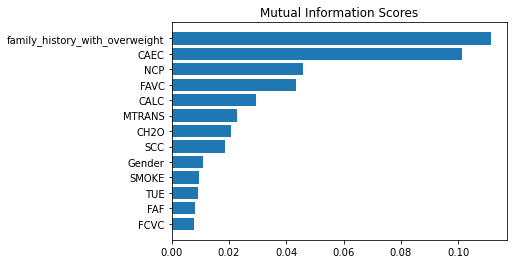

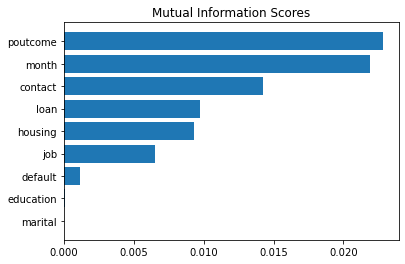

In [14]:
print("MUTUAL INFORMATION FOR OBESITY ==================================")
plot_mutual_information(obesity_data)

print("\n\nMUTUAL INFORMATION FOR BANK-MARKETING ==================================")
plot_mutual_information(bank_data)
print("")

**Question 3.a**

The plots above show that both datasets exhibit features which are clearly 'better' for classification that others. Note that Mutual Information only represents the relative potential of a feature as an independent predictor of the class. It does not represent any interactions between features. Furthermore, mutual information by itself does not determine usefulness as it depends on how the model learns the feature. Since we are using the Naive Bayes classifier, and therefore 'learning' the values of all observed features, it is fairly useful.

For the Obesity dataset is is clear that features such as 'family_history_with_overweight', 'CAEC' and 'FAVC' are comparatively better metrics than 'Gender, 'TUE', and 'CH20' for predicting whether a person is obese. However, the MI values are all below 0.12, which means that the 'best' feature only provides a 12% indication of the label.

For the Bank-Marketing dataset it is clear that features such as 'poutcome' and 'month' are much better metrics for predictions, at least when compared to 'default' and 'housing'. However, the MI values for this dataset are all extremely low (0.03). This means that at best, poutcome alone only gives a 3% better indication of the label.

**Question 3.b** 

The 'Naive' Bayes classifier assumes that the value of a feature is completely independent of any other feature, given the class. For example, if we are predicting size of an object we assume that the weight of the object and the width of the object is not correlated with each other.

This is a necessary assumption as if we are to consider the relationship of all features, we would require an enormous amount of data that contains every possible combination of feature values. A single unseen feature/value would greatly diminish or even break the classifier's performance.

This assumption can be problematic as it is not representative of the real world. For example, in the Student dataset, one can assume that 'traveltime' affects 'studytime' and 'freetime', which in turn affects the ability for a student to 'goout' or engage in extracurricular 'activities'.  Another example in the Obesity dataset is that we can assume that someone who smokes, consumes alcohol, and frequently consumes high caloric foods would be more likely to have obesity than if they did not partake.

The Naive Bayes classifier assumes none of the above are related and so may not capture the nuanced relationship between certain features.

## Question 4: Feature Selection and Ethics [4 marks]

In [15]:
# Write additional code here, if necessary (you may insert additional code cells)
data = preprocess('student.csv')

edited_data = data.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'romantic', 'famrel', 'Dalc', 'Walc', 'health'], axis=1)
edited_student_model = train(edited_data)
student_predictions = predict(edited_student_model, student_data)

student_truth = list(student_data['label'])

print("Features retained: Medu, Fedu, Mjob, Fjob, reason, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, freetime, goout, absences")
print("Features removed: school, sex, address, famsize, Pstatus, guardian, romantic, famrel, Dalc, Walc, health\n")

# ACCURACY SCORE
student_accuracy =  evaluate("accuracy", student_truth, student_predictions[1], pos_label=None, average=None)
print("Accuracy: ", student_accuracy)

# PRECISION
student_precision_macro = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="macro")
student_precision_micro = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="micro")
student_precision_wavg = evaluate("precision", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("Precision (macro avg): ", student_precision_macro)
print("Precision (micro avg): ", student_precision_micro)
print("Precision (weighted avg): ", student_precision_wavg)

# RECALL
student_recall_macro = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="macro")
student_recall_micro = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="micro")
student_recall_wavg = evaluate("recall", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("Recall (macro avg): ", student_recall_macro)
print("Recall (micro avg): ", student_recall_micro)
print("Recall (weighted avg): ", student_recall_wavg)

# F-SCORE
student_fscore_macro = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="macro")
student_fscore_micro = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="micro")
student_fscore_wavg = evaluate("f-score", student_truth, student_predictions[1], pos_label=None, average="weighted")
print("F-score (macro avg): ", student_fscore_macro)
print("F-score (micro avg): ", student_fscore_micro)
print("F-score (weighted avg): ", student_fscore_wavg)


Features retained: Medu, Fedu, Mjob, Fjob, reason, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, freetime, goout, absences
Features removed: school, sex, address, famsize, Pstatus, guardian, romantic, famrel, Dalc, Walc, health

Accuracy:  0.4268104776579353
Precision (macro avg):  0.45557121144617224
Precision (micro avg):  0.4268104776579353
Precision (weighted avg):  0.43403965139762685
Recall (macro avg):  0.39830158415869565
Recall (micro avg):  0.4268104776579353
Recall (weighted avg):  0.4268104776579353
F-score (macro avg):  0.4142045331314923
F-score (micro avg):  0.4268104776579353
F-score (weighted avg):  0.426274675390222


**Question 4.a**

Making a decision to admit/not admit a student based solely on the predicted grade is extremely unfair as it will only provide previously high scoring students an opportunity for further studies.

Looking only at an estimated grade does not take into account a student's individual circumstances, and does not necessarily predict how a student will perform as a lot of the nuance represented in the feature set (which may explain a student's current grade) will not be properly considered.

For example, many of the features in this set relate to things a student cannot change (e.g. address, famsize, traveltime, nursery, internet). Furthermore, many of the features should be irrelevant when making admission decisions (e.g. sex, Medu/Fedu, Mjob/Fjob, romantic, Dalc/Walc). The features also represent ingrained cultural expectations which affect a student's capacity for education (e.g. famsize may allow for certain members to pursue education while others support the household).

**Question 4.b**

The performance of the NB classifier using the reduced-feature set does not perform as well as the NB classifier using the full-feature set. The reduced-feature version predicts the correct class label 42.7% of the time, while the full-featured version predicts the correct class 48.4% of the time. 

This discrepancy shows that my judgement on what is considered ethical/not ethical removed some valuable information which may have assisted in the classification task. In particular, I believe the most important (and unethical features) which I removed include the student's sex, address, Medu/Fedu, Mjob/Fjob and health. Although the NB classifier asserts that each feature is independent from the other, the feature set above is almost definitely related in the real world and would have a large influence on other features of this data set.

Overall, my judgement did not result in a feature set which could better explain a students grades. 

**Question 4.c**

Fairness through unawaress does not guarantee a fair classifier. It only removes certain attributes that may be directly discriminatory, but background knowledge or awareness of certain features can likely still be assumed based on the values of other related features.

For example, if I remove all information like school, sex, Pstatus, Medu, Fedu, Mjob, and Fjob from the student dataset, but keep address (for arguments sake assume it is recorded as a postcode); we can likely still infer that a student comes from a priveleged background if they live in Toorak. 

Fairness through unawareness also strengthens the independence assumption, which clearly does not hold in real-life scenarios. Furthermore, in certain scenarios, removing ethically problematic features from a dataset may be counter productive to achieve an ethical goal (e.g. university admission for underrepresented students). A careful consideration of each feature set is required to find a 'fair' classifier for each task.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Shervyn Singh (1236509)
   
   <b>Dated</b>: 02/09/2022